# Data Question 1: An Exploration of UN data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

- Take a look at the first 10 rows.
- Look at the last 5 rows. Do you see a problem?
- Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [2]:
gdp_df = pd.read_csv('../Data/gdp_per_capita.csv')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
gdp_df = pd.read_csv('../Data/gdp_per_capita.csv', nrows =6868)

### 5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value': 'GDP_Per_Capita'})
print (gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2019     2065.036398
1     Afghanistan  2018     2033.779002
2     Afghanistan  2017     2058.383832
3     Afghanistan  2016     2057.062164
4     Afghanistan  2015     2068.265904
...           ...   ...             ...
6863     Zimbabwe  1994     3263.934978
6864     Zimbabwe  1993     3033.504852
6865     Zimbabwe  1992     3054.889178
6866     Zimbabwe  1991     3426.598094
6867     Zimbabwe  1990     3324.348171

[6868 rows x 3 columns]


### 6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


### 7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [8]:
print (gdp_df["Year"].value_counts())

2017    238
2016    238
2015    238
2014    238
2013    238
2012    237
2011    237
2018    237
2010    236
2009    236
2008    235
2007    235
2006    235
2005    234
2004    234
2003    233
2002    233
2001    232
2000    231
2019    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64


### 8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [9]:
gdp_df["Country"].value_counts()

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

### 9. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [10]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
print (gdp_2014)

                  Country  Year  GDP_Per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


### 10. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [11]:
print(gdp_2014.describe())

         Year  GDP_Per_Capita
count   238.0      238.000000
mean   2014.0    19766.710348
std       0.0    20983.869623
min    2014.0      822.610458
25%    2014.0     4753.110934
50%    2014.0    12209.385755
75%    2014.0    26803.610474
max    2014.0   156514.133850


### 11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

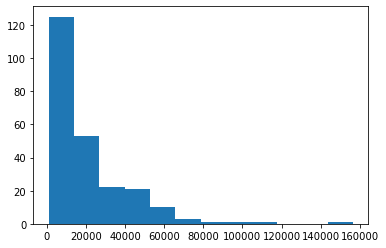

In [12]:
plt.hist(gdp_2014['GDP_Per_Capita'], bins=12)
plt.show()

Right skewed, unimodal

### 12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.



In [13]:
print (gdp_2014.sort_values('GDP_Per_Capita', ascending = False))

                       Country  Year  GDP_Per_Capita
3721          Macao SAR, China  2014   156514.133850
3691                Luxembourg  2014   108760.916030
5138                     Qatar  2014    95578.416973
5464                 Singapore  2014    87808.663157
561                    Bermuda  2014    77361.104881
...                        ...   ...             ...
4528                     Niger  2014     1127.615541
1422           Dem. Rep. Congo  2014     1029.790785
3781                    Malawi  2014     1027.208496
827                    Burundi  2014      886.235777
1047  Central African Republic  2014      822.610458

[238 rows x 3 columns]


Top Five = Macao SAR (China), Luxembourg, Qatar, Singapore, Bermuda

Bottom Five = Niger, Dem.Rep.Congo, Malawi, Burundi, Central African Republic

### 13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivot

In [14]:
gdp_pivoted = pd.pivot_table(gdp_df.loc[gdp_df['Year'].isin([1990, 2017])], index=['Country'], columns=['Year']).dropna()
gdp_pivoted

GDP_Per_Capita              
Year                          1990          2017
Country                                         
Albania                4842.734635  12811.759436
Algeria                8746.352901  11737.409353
Angola                 5783.429064   7310.901738
Antigua and Barbuda   15459.551675  19840.076123
Arab World             9694.667544  14555.474921
...                            ...           ...
Vanuatu                2888.309393   3116.645194
Vietnam                1673.249634   7155.745829
World                  9680.269697  16253.385518
Zambia                 2190.182814   3485.005238
Zimbabwe               3324.348171   3028.245976

[207 rows x 2 columns]

In [15]:
gdp_pivoted.columns

MultiIndex([('GDP_Per_Capita', 1990),
            ('GDP_Per_Capita', 2017)],
           names=[None, 'Year'])

In [16]:
gdp_pivoted.info()
type(gdp_pivoted)

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Albania to Zimbabwe
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (GDP_Per_Capita, 1990)  207 non-null    float64
 1   (GDP_Per_Capita, 2017)  207 non-null    float64
dtypes: float64(2)
memory usage: 4.9+ KB


pandas.core.frame.DataFrame

### 14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.



In [17]:
gdp_pivoted["Percentage_Change"] = 100 * (gdp_pivoted[("GDP_Per_Capita", 2017)] - gdp_pivoted[("GDP_Per_Capita", 1990)])/ gdp_pivoted[("GDP_Per_Capita", 1990)]
gdp_pivoted

GDP_Per_Capita               Percentage_Change
Year                          1990          2017                  
Country                                                           
Albania                4842.734635  12811.759436        164.556297
Algeria                8746.352901  11737.409353         34.197756
Angola                 5783.429064   7310.901738         26.411194
Antigua and Barbuda   15459.551675  19840.076123         28.335391
Arab World             9694.667544  14555.474921         50.138980
...                            ...           ...               ...
Vanuatu                2888.309393   3116.645194          7.905517
Vietnam                1673.249634   7155.745829        327.655604
World                  9680.269697  16253.385518         67.902197
Zambia                 2190.182814   3485.005238         59.119377
Zimbabwe               3324.348171   3028.245976         -8.907075

[207 rows x 3 columns]

### 15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [18]:
gdp_pivoted[gdp_pivoted["Percentage_Change"] < 0]

GDP_Per_Capita               Percentage_Change
Year                               1990          2017                  
Country                                                                
Brunei                     71230.862143  60995.681114        -14.369026
Burundi                     1184.842440    773.571858        -34.710993
Central African Republic    1201.677234    912.802052        -24.039332
Comoros                     3061.360665   3032.254682         -0.950753
Congo                       5115.210903   4274.296414        -16.439488
Dem. Rep. Congo             1819.723315   1059.810775        -41.759785
Gabon                      18179.265733  15006.764091        -17.451209
Guinea-Bissau               1994.669656   1925.237737         -3.480873
Haiti                       3229.618638   2980.960856         -7.699292
Kyrgyz Republic             5158.317569   5046.691535         -2.164001
Madagascar                  1853.051624   1584.422678        -14.496571
Tajikistan                  3869.043636   3089.530208        -20.147445
The Bahamas                38099.848616  36297.307023         -4.731099
The Gambia                  2265.238219   2072.652450         -8.501789
Ukraine                    15751.722440  11871.123624        -24.636028
United Arab Emirates      111454.360446  67183.626557        -39.720953
Zimbabwe                    3324.348171   3028.245976         -8.907075

### 16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.



In [19]:
gdp_pivoted.sort_values("Percentage_Change", ascending = False)

GDP_Per_Capita                \
Year                                                  1990          2017   
Country                                                                    
Equatorial Guinea                              1039.985049  22551.083246   
China                                          1423.896348  14344.421239   
Myanmar                                         619.645144   4739.910118   
East Asia & Pacific (excluding high income)    2173.223895  12986.322227   
East Asia & Pacific (IDA & IBRD)               2196.950288  13123.151792   
...                                                    ...           ...   
Central African Republic                       1201.677234    912.802052   
Ukraine                                       15751.722440  11871.123624   
Burundi                                        1184.842440    773.571858   
United Arab Emirates                         111454.360446  67183.626557   
Dem. Rep. Congo                                1819.723315   1059.810775   

                                            Percentage_Change  
Year                                                           
Country                                                        
Equatorial Guinea                                 2068.404561  
China                                              907.406281  
Myanmar                                            664.939443  
East Asia & Pacific (excluding high income)        497.560254  
East Asia & Pacific (IDA & IBRD)                   497.334945  
...                                                       ...  
Central African Republic                           -24.039332  
Ukraine                                            -24.636028  
Burundi                                            -34.710993  
United Arab Emirates                               -39.720953  
Dem. Rep. Congo                                    -41.759785  

[207 rows x 3 columns]

In [20]:
gdp_pivoted.nlargest(2, "Percentage_Change")

GDP_Per_Capita               Percentage_Change
Year                        1990          2017                  
Country                                                         
Equatorial Guinea    1039.985049  22551.083246       2068.404561
China                1423.896348  14344.421239        907.406281

In [21]:
gdp_df[gdp_df['Country'] == 'Equatorial Guinea']


,Country,Year,GDP_Per_Capita
1754,Equatorial Guinea,2019,18558.003852
1755,Equatorial Guinea,2018,20359.845144
1756,Equatorial Guinea,2017,22551.083246
1757,Equatorial Guinea,2016,24827.072978
1758,Equatorial Guinea,2015,28313.602763
1759,Equatorial Guinea,2014,32436.466793
1760,Equatorial Guinea,2013,33678.706547
1761,Equatorial Guinea,2012,36671.357436
1762,Equatorial Guinea,2011,35378.023284
1763,Equatorial Guinea,2010,34732.255956


In [22]:
gdp_df[gdp_df['Country']== 'Equatorial Guinea'].sort_values('Year')

,Country,Year,GDP_Per_Capita
1783,Equatorial Guinea,1990,1039.985049
1782,Equatorial Guinea,1991,996.857617
1781,Equatorial Guinea,1992,1299.934196
1780,Equatorial Guinea,1993,1395.403468
1779,Equatorial Guinea,1994,1572.065607
1778,Equatorial Guinea,1995,1781.264878
1777,Equatorial Guinea,1996,2857.452417
1776,Equatorial Guinea,1997,6868.480369
1775,Equatorial Guinea,1998,8166.052518
1774,Equatorial Guinea,1999,9851.190917


Text(0.5, 1.0, 'Equatorial Guinea GDP_Per_Capita')

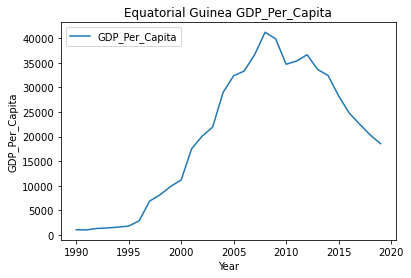

In [23]:
gdp_df[gdp_df['Country']== 'Equatorial Guinea'].sort_values('Year').plot.line(x='Year', y='GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.title('Equatorial Guinea GDP_Per_Capita')

Text(0.5, 1.0, 'China GDP_Per_Capita')

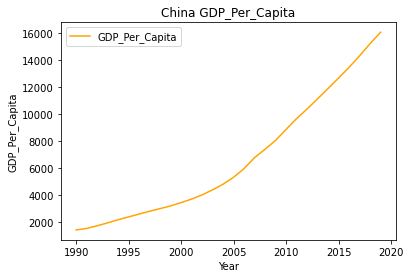

In [24]:
gdp_df[gdp_df['Country']== 'China'].sort_values('Year').plot.line(x='Year', y='GDP_Per_Capita', color ='orange')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.title('China GDP_Per_Capita')

Text(0.5, 1.0, 'GDP_Per_Capita vs Year')

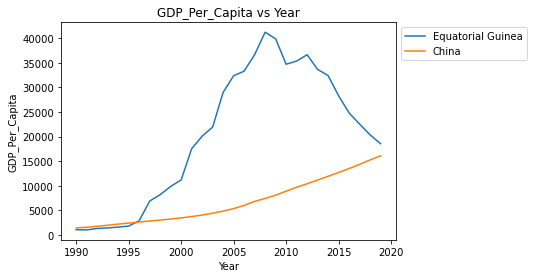

In [25]:

ax = gdp_df[gdp_df['Country']== 'Equatorial Guinea'].sort_values('Year').plot(kind = 'line', x ='Year', y ='GDP_Per_Capita',label = 'Equatorial Guinea')
gdp_df[gdp_df['Country']== 'China'].sort_values('Year').plot(kind = 'line', x ='Year', y ='GDP_Per_Capita',label = 'China', ax=ax)
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.legend(bbox_to_anchor =(1.0, 1.0))
plt.title('GDP_Per_Capita vs Year')

### plt.figure() ? when to use

### 17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [26]:
continents = pd.read_csv('../data/continents.csv')

In [27]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


### 18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.



In [28]:
gdp_df = gdp_df.merge(continents).dropna()
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


In [29]:
gdp_df = gdp_df.merge(continents,how ='inner') # on = 'Country' can also be used
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


### 19. Determine the number of countries per continent. Create a bar chart showing this.

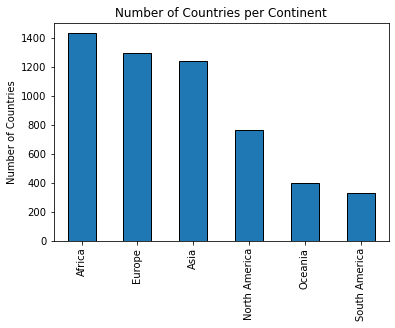

In [30]:
gdp_df["Continent"].value_counts().plot(kind = 'bar', edgecolor ='black')
plt.ylabel('Number of Countries')
plt.title('Number of Countries per Continent')
plt.show()

In [31]:
gdp_df["Continent"].value_counts()

Africa           1428
Europe           1290
Asia             1240
North America     761
Oceania           394
South America     330
Name: Continent, dtype: int64

### 20. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

<AxesSubplot:xlabel='Continent', ylabel='GDP_Per_Capita'>

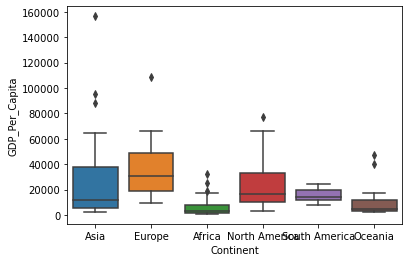

In [32]:
#gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
sns.boxplot(data = gdp_df[gdp_df['Year'] == 2014], x ='Continent', y ='GDP_Per_Capita')


### 21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy.

In [33]:
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_4553490.csv', header = 2)
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683,71.087805,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,66.181000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,...,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,64.379000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,64.194000,NaN,NaN


### 22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.



In [34]:
life_expectancy = life_expectancy.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])

In [35]:
life_expectancy.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.403000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,39.662762,40.066408,40.482832,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.178000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN


In [36]:
#life_expectancy = life_expectancy.melt(id_vars = ['Country Name'])
#life_expectancy

In [37]:
life_expectancy = life_expectancy.melt(
                  id_vars="Country Name",
                  var_name="Year", 
                  value_name="life expectancy")
life_expectancy

,Country Name,Year,life expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000
...,...,...,...
16753,Kosovo,Unnamed: 66,NaN
16754,"Yemen, Rep.",Unnamed: 66,NaN
16755,South Africa,Unnamed: 66,NaN
16756,Zambia,Unnamed: 66,NaN


### 23. What was the first country with a life expectancy to exceed 80?

In [46]:
life_expectancy[life_expectancy['life expectancy'] > 80].sort_values('Year')

,Country Name,Year,life expectancy
9695,Japan,1996,80.200244
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
10204,"Hong Kong SAR, China",1998,80.131707
10227,Japan,1998,80.501463
...,...,...,...
16037,France,2020,82.175610
16038,Faroe Islands,2020,83.092683
16041,United Kingdom,2020,80.902439
16053,Guam,2020,80.277000


### 24. Merge gdp_per_capita and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [51]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


In [50]:
life_expectancy

,Country Name,Year,life expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000
...,...,...,...
16753,Kosovo,Unnamed: 66,NaN
16754,"Yemen, Rep.",Unnamed: 66,NaN
16755,South Africa,Unnamed: 66,NaN
16756,Zambia,Unnamed: 66,NaN


In [57]:
gdp_df['Year'] = gdp_df['Year'].astype(str)

In [58]:
life_expectancy['Year'] = life_expectancy['Year'].astype(str)

In [62]:
pd.merge(left = gdp_df, 
         right = life_expectancy.rename(columns = {'Country Name': 'Country'}), 
         left_on = ['Country', 'Year'], 
         right_on = ['Country', 'Year'])


,Country,Year,GDP_Per_Capita,Continent,life expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377
...,...,...,...,...,...
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749


### 25. Create a new DataFrame, named gdp_le_2019 by extracting data for the year 2019 from gdp_le. How many countries have a life expectancy of at least 80 in 2019?

### 26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

### 27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

### 28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?



### 29. Add a column to gdp_le_2019 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

